In [1]:
from datasets import load_dataset
from pydub import AudioSegment
import IPython

In [2]:
ds = load_dataset('speechcolab/gigaspeech', 'dev', trust_remote_code=True)

In [3]:
ds['validation'][0]

{'segment_id': 'YOU1000000044_S0001436',
 'speaker': 'N/A',
 'text': "A LOT OF IT BEEN THE MARKETING OUR SITE <COMMA> THAT <COMMA> REALLY IS JUST GETTING PEOPLE TO WATCH IT <COMMA> AH THAT'S BEEN THE BIGGEST PART OF ALL FOR GROWING <PERIOD>",
 'audio': {'path': '/Users/suprateembanerjee/.cache/huggingface/datasets/downloads/extracted/3abd6a35ee12010a1f2bb2938482d6fea34d9d091227e5a6010f912facc260ee/dev_chunks_0000/YOU1000000044_S0001436.wav',
  'array': array([ 0.00146484,  0.00024414,  0.00015259, ...,  0.00015259,
          0.00021362, -0.00012207]),
  'sampling_rate': 16000},
 'begin_time': 7119.20703125,
 'end_time': 7127.466796875,
 'audio_id': 'YOU1000000044',
 'title': 'YOU1000000044',
 'url': 'N/A',
 'source': 2,
 'category': 10,
 'original_full_path': 'audio/youtube/P0000/YOU1000000044.opus'}

In [4]:
i = 17

IPython.display.Audio(ds['validation'][i]['audio']['path'],
                      rate=ds['validation'][i]['audio']['sampling_rate'])

In [ ]:
from pyannote.audio import Pipeline

In [7]:
pipeline = Pipeline.from_pretrained('pyannote/speaker-diarization-3.1')

In [5]:
IPython.display.Audio('sample.wav')

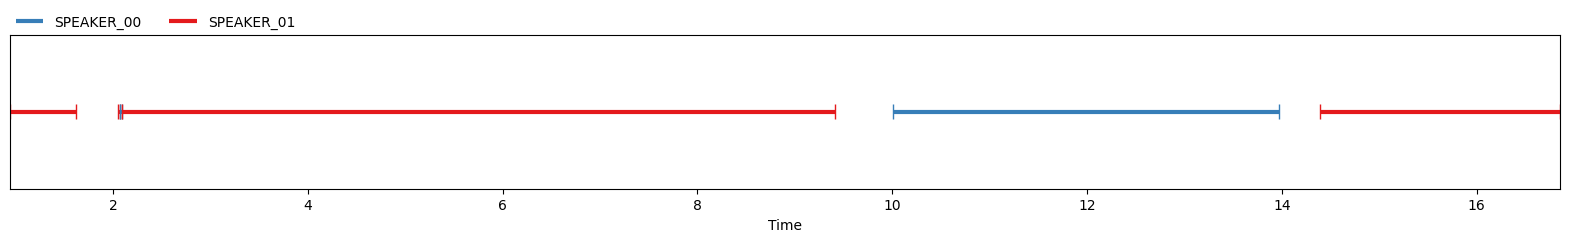

In [ ]:
conversation = pipeline('sample.wav', num_speakers=2)
conversation

In [69]:
segments = {}

for segment in conversation.itertracks(yield_label=True):
    duration, _, speaker = segment

    segments[speaker] = segments.get(speaker, []) + list(duration)
    print(duration, speaker)

segments

[ 00:00:00.942 -->  00:00:01.617] SPEAKER_01
[ 00:00:02.055 -->  00:00:02.072] SPEAKER_01
[ 00:00:02.072 -->  00:00:02.089] SPEAKER_00
[ 00:00:02.089 -->  00:00:09.413] SPEAKER_01
[ 00:00:10.004 -->  00:00:13.969] SPEAKER_00
[ 00:00:14.391 -->  00:00:16.855] SPEAKER_01


{'SPEAKER_01': [0.9422187500000001,
  1.6172187500000001,
  2.0559687500000003,
  2.07284375,
  2.0897187500000003,
  9.41346875,
  14.391593750000002,
  16.85534375],
 'SPEAKER_00': [2.07284375,
  2.0897187500000003,
  10.004093750000003,
  13.969718750000002]}

In [ ]:
audio = AudioSegment.from_file('sample.wav')

consolidated = {}

for speaker in segments:

    merged_audio = AudioSegment.silent(duration=0)
    i = 0
    while i < len(segments[speaker]):
        merged_audio += audio[int(segments[speaker][i] * 1000): int(segments[speaker][i + 1] * 1000)]
        i += 2
    consolidated[speaker] = merged_audio

for speaker in consolidated:
    consolidated[speaker].export(f'output_{speaker}.wav', format='wav')

In [5]:
import torch
from transformers import pipeline

whisper = pipeline("automatic-speech-recognition", "openai/whisper-large-v3", torch_dtype=torch.float16, device="mps")

transcription = whisper('sample.wav')

print(transcription["text"])

Device set to use mps
/Users/suprateembanerjee/miniforge3/envs/audio/lib/python3.10/site-packages/transformers/models/whisper/generation_whisper.py:512: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


 Hi, how are you doing? Good, how are you? Doing good, doing good. So today we are at MIT, we are doing the Sunday Hack. How are you liking it so far? It's pretty interesting, get to learn something new. I've never done anything with voice cloning before. Amazing, amazing. I mean, that should be enough.
